2023-08-27 15:03:22.518963: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-27 15:03:22.597377: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-27 15:03:22.599169: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-27 15:03:24.007301: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


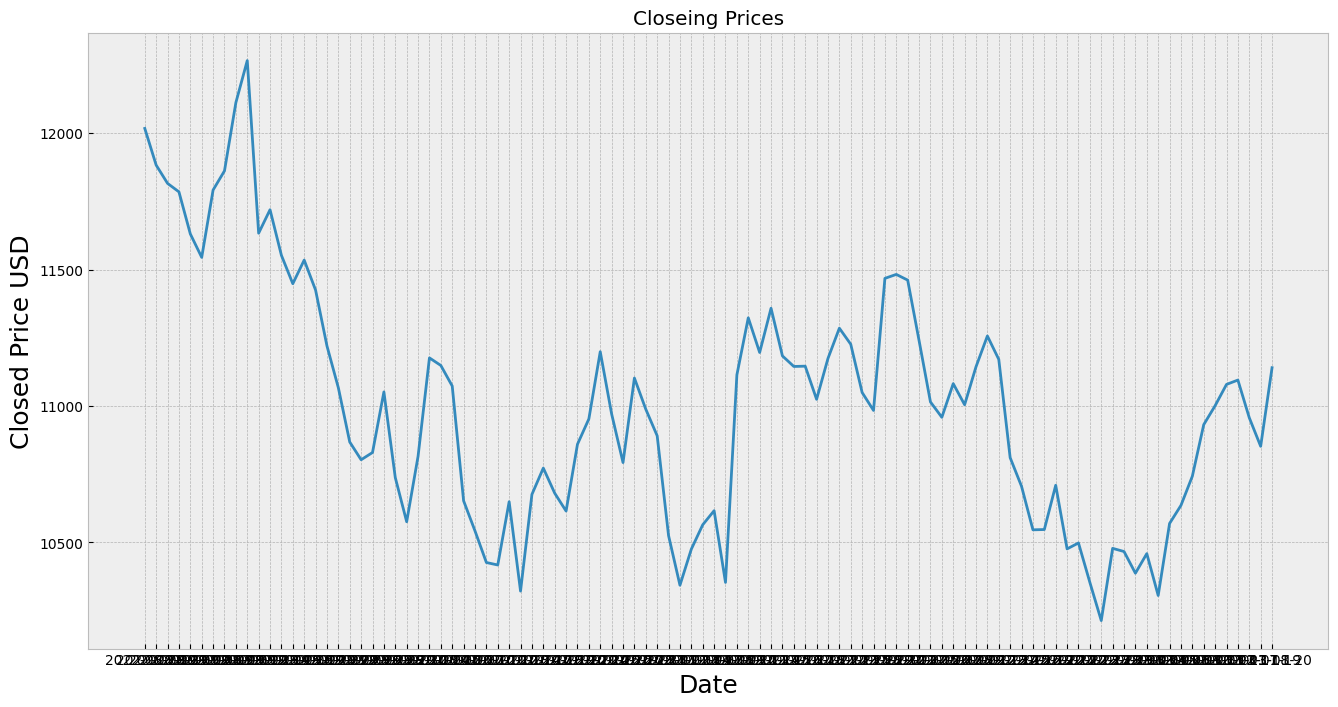

[array([0.8788477 , 0.8133229 , 0.78071913, 0.76558592, 0.69044685,
       0.64858364, 0.76888358, 0.80308981, 0.92494322, 1.        ,
       0.69176677, 0.73370751, 0.65221236, 0.60157725, 0.64376628,
       0.59020403, 0.49042449, 0.41571826, 0.31885112, 0.28718723,
       0.30013342, 0.40832955, 0.25532833, 0.17647778, 0.29328028,
       0.46910072, 0.45557471, 0.41888418, 0.21387465, 0.16015116,
       0.10369602, 0.09926822, 0.2122917 , 0.05265138, 0.22527165,
       0.27232228, 0.22756571, 0.19558028, 0.31485235, 0.36009599,
       0.48016191, 0.36904816, 0.28219483, 0.43307751, 0.37740624,
       0.33001458, 0.15172506, 0.06314798, 0.12759115, 0.17107109,
       0.19624286, 0.06813039, 0.43877625, 0.54066006, 0.47874924,
       0.55774628, 0.47263193, 0.45378247, 0.45431805, 0.39511557])]
[0.468126588913063]

[array([0.8788477 , 0.8133229 , 0.78071913, 0.76558592, 0.69044685,
       0.64858364, 0.76888358, 0.80308981, 0.92494322, 1.        ,
       0.69176677, 0.73370751, 0.6522

/tmp/ipykernel_549678/3272534228.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_validation['Predict'] = pred


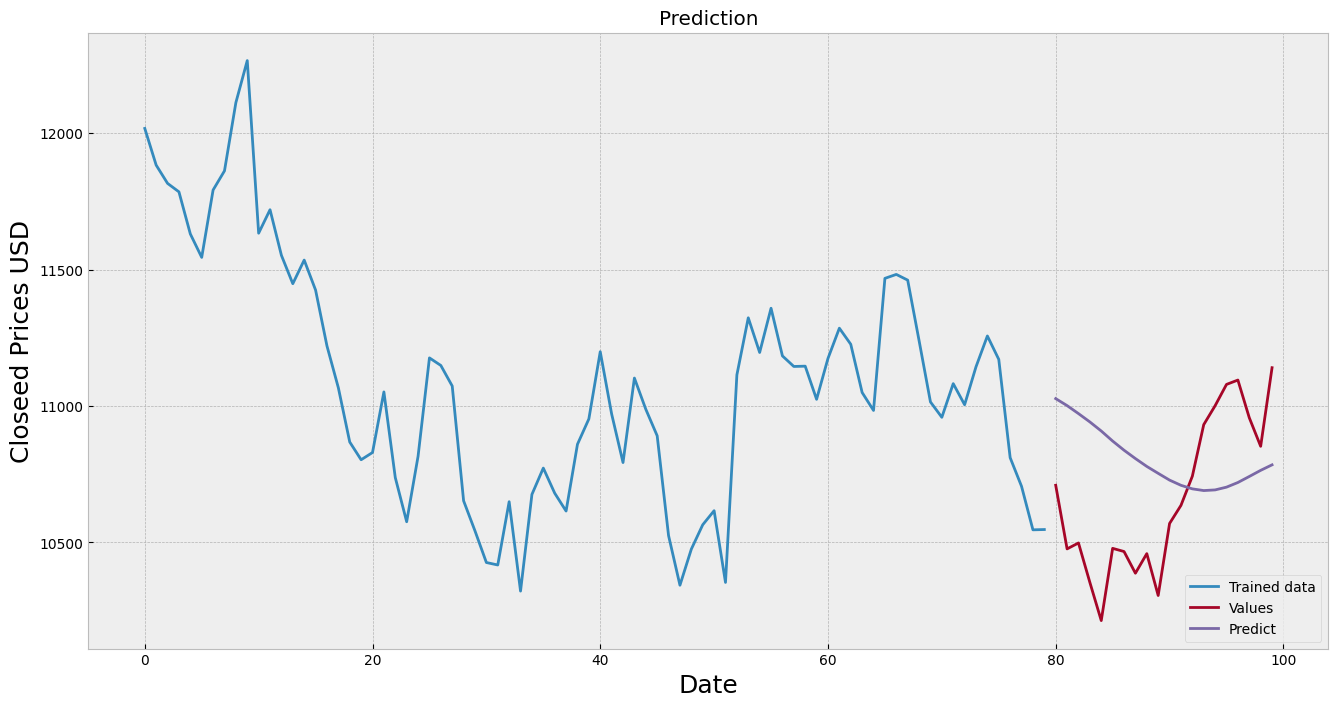

1/1 [==============================] - 0s 35ms/step
[[12505.024]]
0      2022-08-29
1      2022-08-30
2      2022-08-31
3      2022-09-01
4      2022-09-02
          ...    
245    2023-08-21
246    2023-08-22
247    2023-08-23
248    2023-08-24
249    2023-08-25
Name: Date, Length: 250, dtype: object


In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('bmh')
import tensorflow as tf

#The index funds ML price prediction app is not intended for real world application. The index funds ML price prediction app is strictly for educational purposes!


df = pd.read_csv('./IXIC.csv')
#100 rows
df = df.head(100)
#Display data
df
#Get the number of rows and columns in the dataset 
df.shape

#Visualization
plt.figure(figsize=(16,8))
plt.title('Closeing Prices')
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closed Price USD', fontsize=18)
plt.show()


#Create dataframe 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a np array
dt_set = data.values
#Number of rows for training
training_data_len = math.ceil( len(dt_set) *.8)

training_data_len

#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dt_set)
scaled_data

#Training dt_set
#Scaled_training dt_set
train_dt = scaled_data[0:training_data_len , :]
#Split data
x_train = []
y_train = []

for i in range(60, len(train_dt)):
    x_train.append(train_dt[i-60:i, 0])
    y_train.append(train_dt[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
#Convert data to np arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Restructure the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

#LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(15))
model.add(Dense(1))

#Compile
model.compile(optimizer='adam', loss='mean_squared_error')

#Train
model.fit(x_train, y_train, batch_size=1, epochs=1)

#Testing the dt_set
#Array with scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Test data x_test and y_test
x_test = []
y_test = dt_set[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
#Convert data to a np array
x_test = np.array(x_test)
#Restructure the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
#Predicted price values
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

#Root mean squared error
rmse=np.sqrt(np.mean(((pred- y_test)**2)))
rmse

#Plot the data
train = data[:training_data_len]
m_validation = data[training_data_len:]
m_validation['Predict'] = pred
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closeed Prices USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(m_validation[['Close', 'Predict']])
plt.legend(['Trained data', 'Values', 'Predict'], loc='lower right')
plt.show()

#Model validation and predicted prices
m_validation

#Get data
nasdaq_c = pd.read_csv('./IXIC.csv')
#New Dataframe
new_df = nasdaq_c.filter(['Close'])
#60 day history
history_60_days = new_df[-60:].values
#Scale the data  0 && 1
history_60_days_scaled = scaler.transform(history_60_days)
#List
X_test = []
#Add 60 day history
X_test.append(history_60_days_scaled)
#Convert the X_test data set to a np array
X_test = np.array(X_test)
#Restructure the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Predicted scaled price
predicted_price = model.predict(X_test)
#Revert the scaling
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)


nasdaq_c = pd.read_csv('./IXIC.csv')
print(nasdaq_c['Date'])
